<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4**

### **MNIST data**

In [1]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hyperparameter
batch_size = 128
num_classes = 10
epoch = 12

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


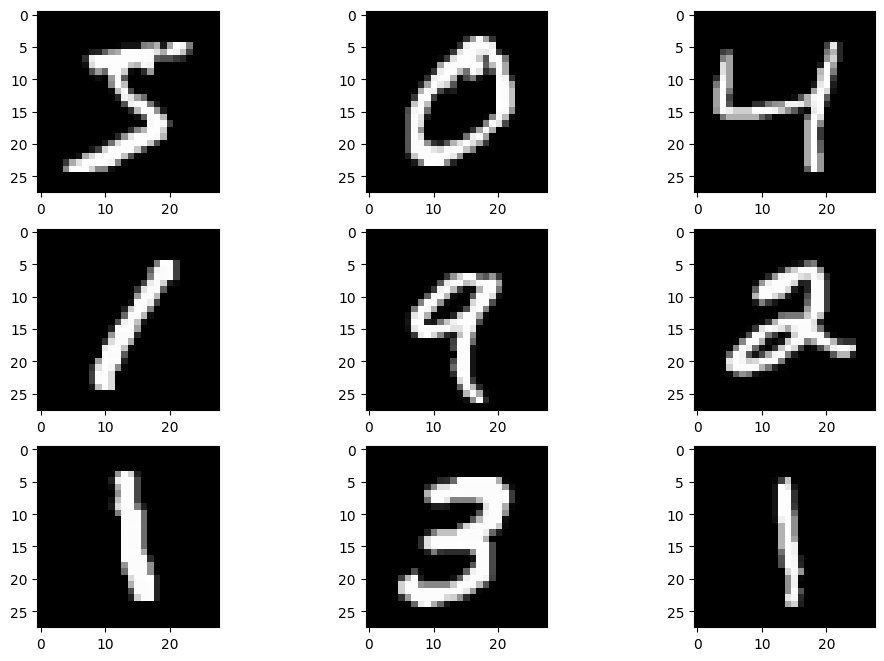

In [5]:
plt.figure(figsize=(12,8))

count = 0

for i in range(9):
    count += 1
    plt.subplot(3,3,count)
    plt.imshow(x_train[i].reshape(28,28), cmap = plt.get_cmap('gray'),  interpolation='nearest')

plt.show()

전처리 과정 필요

In [6]:
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

In [7]:
# Normalization
x_train /= 255
x_test /= 255

In [8]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=1, activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(64, kernel_size=(2,2), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,098 (98.04 KB)

 Trainable params: 25,098 (98.04 KB)

 Non-trainable params: 0 (0.00 B)

model fitting

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs=10, verbose=1,
                 validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 92ms/step - accuracy: 0.7562 - loss: 0.7792 - val_accuracy: 0.9750 - val_loss: 0.0888
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9657 - loss: 0.1157 - val_accuracy: 0.9809 - val_loss: 0.0577
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9747 - loss: 0.0833 - val_accuracy: 0.9866 - val_loss: 0.0445
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9777 - loss: 0.0722 - val_accuracy: 0.9872 - val_loss: 0.0384
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.9798 - loss: 0.0633 - val_accuracy: 0.9881 - val_loss: 0.0361
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.9826 - loss: 0.0568 - val_accuracy: 0.9890 - val_loss: 0.0325
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9838 - loss: 0.0513 - val_accuracy: 0.9900 - val_loss: 0.0305
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - accuracy: 0.9855 - loss: 0.0475 -

evaluation

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test model:', score[0])
print('Test accuracy:', score[1])

Test model: 0.027096018195152283
Test accuracy: 0.9900000095367432


confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print(y_pred_class.size)
print(y_test_class.size)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
10000
10000


In [14]:
y_pred.shape

(10000, 10)

In [15]:
conf_mat = confusion_matrix(y_test_class, y_pred_class)
print(conf_mat)

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   2    2 1022    0    1    0    1    3    1    0]
 [   0    0    2 1000    0    2    0    4    2    0]
 [   0    0    0    0  973    0    1    0    3    5]
 [   2    0    0    5    0  882    1    1    1    0]
 [   6    2    1    0    1    2  943    0    3    0]
 [   0    1    5    2    1    0    0 1018    1    0]
 [   4    0    2    1    1    1    0    2  961    2]
 [   2    2    0    0    3    2    0    6    2  992]]


In [16]:
label = range(10)
import pandas as pd
table = pd.DataFrame(conf_mat, columns = label, index = label)
table

,0,1,2,3,4,5,6,7,8,9
0,978,0,0,0,0,0,0,1,1,0
1,0,1131,2,0,0,0,1,1,0,0
2,2,2,1022,0,1,0,1,3,1,0
3,0,0,2,1000,0,2,0,4,2,0
4,0,0,0,0,973,0,1,0,3,5
5,2,0,0,5,0,882,1,1,1,0
6,6,2,1,0,1,2,943,0,3,0
7,0,1,5,2,1,0,0,1018,1,0
8,4,0,2,1,1,1,0,2,961,2
9,2,2,0,0,3,2,0,6,2,992


### **CIFAR10 data**

In [17]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', y_train.shape)
print('Y_test:', y_test.shape)

X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
Y_train: (50000, 1)
Y_test: (10000, 1)


In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

Define Model

In [22]:
model = keras.Sequential([
    layers.Conv2D(16, kernel_size = (3,3), activation='relu',
                  kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation = 'relu',
                  kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform',
           padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,834 (132.16 KB)

 Trainable params: 33,834 (132.16 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy', patience = 10)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy')

Early stopping
- monitor: 감시할 성능 지표
- patience: 개선 없이 기다릴 최대 epoch 수

ModelCheckpoint
- filepath: 모델 저장 경로
- monitor: 저장 기준이 되는 지표
- verbose : 1이면 저장될 때마다 메시지 출력

Model fitting

In [25]:
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size,
                    validation_data = (X_test, y_test), verbose=1, callbacks=[es,mc])

Epoch 1/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4120 - loss: 1.6344

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.4121 - loss: 1.6341 - val_accuracy: 0.5933 - val_loss: 1.1512
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6148 - loss: 1.1012

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6148 - loss: 1.1012 - val_accuracy: 0.6533 - val_loss: 0.9984
Epoch 3/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6761 - loss: 0.9261

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6761 - loss: 0.9261 - val_accuracy: 0.6729 - val_loss: 0.9490
Epoch 4/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7119 - loss: 0.8301

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7119 - loss: 0.8301 - val_accuracy: 0.6930 - val_loss: 0.8946
Epoch 5/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7365 - loss: 0.7660

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7365 - loss: 0.7660 - val_accuracy: 0.6995 - val_loss: 0.8723
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7505 - loss: 0.7128

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7505 - loss: 0.7128 - val_accuracy: 0.7067 - val_loss: 0.8700
Epoch 7/100
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7694 - loss: 0.6687

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7694 - loss: 0.6687 - val_accuracy: 0.7107 - val_loss: 0.8563
Epoch 8/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7840 - loss: 0.6327

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7840 - loss: 0.6327 - val_accuracy: 0.7198 - val_loss: 0.8386
Epoch 9/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7964 - loss: 0.5873

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7964 - loss: 0.5874 - val_accuracy: 0.7239 - val_loss: 0.8307
Epoch 10/100
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8016 - loss: 0.5664

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8016 - loss: 0.5665 - val_accuracy: 0.7157 - val_loss: 0.8855
Epoch 11/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8089 - loss: 0.5427

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8089 - loss: 0.5427 - val_accuracy: 0.7285 - val_loss: 0.8327
Epoch 12/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8205 - loss: 0.5117

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8205 - loss: 0.5118 - val_accuracy: 0.7209 - val_loss: 0.8831
Epoch 13/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8278 - loss: 0.4962

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.8278 - loss: 0.4962 - val_accuracy: 0.7216 - val_loss: 0.8763
Epoch 14/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8337 - loss: 0.4785

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8337 - loss: 0.4785 - val_accuracy: 0.7291 - val_loss: 0.8561
Epoch 15/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8405 - loss: 0.4584

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.8405 - loss: 0.4585 - val_accuracy: 0.7239 - val_loss: 0.9142
Epoch 16/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8481 - loss: 0.4370

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8481 - loss: 0.4371 - val_accuracy: 0.7270 - val_loss: 0.9073
Epoch 17/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8518 - loss: 0.4205

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.8518 - loss: 0.4205 - val_accuracy: 0.7242 - val_loss: 0.9068
Epoch 18/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8589 - loss: 0.4025

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - accuracy: 0.8589 - loss: 0.4025 - val_accuracy: 0.7255 - val_loss: 0.9538
Epoch 19/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8588 - loss: 0.3968

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.8588 - loss: 0.3968 - val_accuracy: 0.7164 - val_loss: 0.9948
Epoch 20/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8633 - loss: 0.3839

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.8633 - loss: 0.3839 - val_accuracy: 0.7163 - val_loss: 1.0040
Epoch 21/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8636 - loss: 0.3805

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8636 - loss: 0.3805 - val_accuracy: 0.7218 - val_loss: 1.0080
Epoch 22/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8710 - loss: 0.3642

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.8710 - loss: 0.3642 - val_accuracy: 0.7186 - val_loss: 1.0242
Epoch 23/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8776 - loss: 0.3431

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8776 - loss: 0.3432 - val_accuracy: 0.7169 - val_loss: 1.0311
Epoch 24/100
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8756 - loss: 0.3448

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.8756 - loss: 0.3448 - val_accuracy: 0.7208 - val_loss: 1.0805


training history 시각화

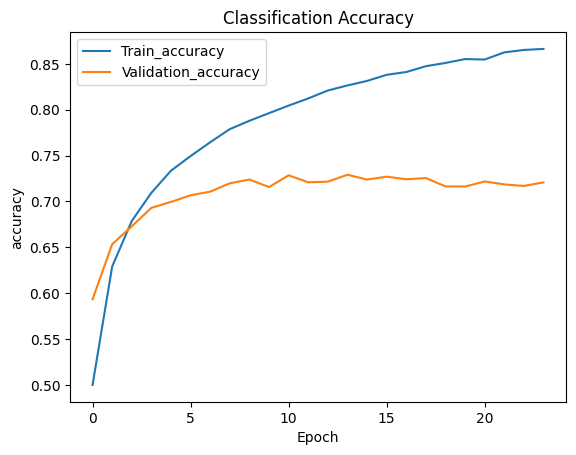

In [26]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

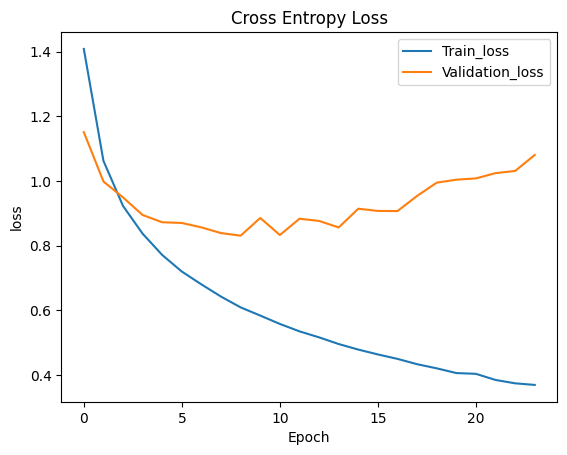

In [27]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Evaluation

In [28]:
score = model.evaluate(X_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7188 - loss: 1.0496
Test loss:  1.0804520845413208
Test accuracy:  0.72079998254776


In [29]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test_class, y_pred_class)

print(conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
[[759  19  69  28  13   8  11   9  56  28]
 [ 17 871   7  11   3   6   7   6  22  50]
 [ 66   9 646  59  56  55  58  36   9   6]
 [ 22   8  87 573  54 144  54  39  12   7]
 [ 21   3  88  73 663  48  48  44  11   1]
 [ 16   2  53 187  25 629  26  48   6   8]
 [  8   5  55  73  26  25 796   5   7   0]
 [ 18   4  44  61  52  62   7 746   1   5]
 [ 83  39  17  19   9   6   6   8 798  15]
 [ 38 121  17  21   5  12  13  25  21 727]]


Batch Normalization을 추가할 수도 있음

In [30]:
def model_3():
    model = Sequential()

    # first convolutional layer
    model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same',
input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # second convolutional layer
    model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # third convolutional layer
    model.add(Conv2D(16, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # fully connected classifier
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.add(Dropout(0.1))

    # compile model
    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [31]:
from tensorflow.keras.layers import BatchNormalization, Dropout,Activation
from tensorflow.keras import optimizers

In [32]:
model = model_3()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             

 Total params: 29,322 (114.54 KB)

 Trainable params: 29,034 (113.41 KB)

 Non-trainable params: 288 (1.12 KB)